In [1]:
import sys
sys.path.insert(0, '../Data')

from fmp_module import *
%matplotlib inline

In [2]:
audio_path = '../Data/MPB Audios/'
label_path = '../Data/MPB Labels/'
var_path = '../Data/Variables/'

audios = var_path + 'caetano_audios.txt'
labels = var_path + 'tetrad_caetano_labels.txt'

color_ann = {'N': 'white', 
             'C': 'peru', 'C#': 'springgreen', 'D': 'coral', 
             'D#': 'olive', 'Dm': 'teal', 'Em': 'pink',
             'F': 'greenyellow', 'F#': 'purple','G': 'steelblue', 'G#':'indigo', 
             'Am':'orange', 'A#':'saddlwbrown', 'A#m':'lightcoral'}

song_selected = [0, 1]

In [3]:
audio_list = get_files(audios, audio_path)
label_list = get_files(labels, label_path)
name_list = get_name_list(audio_list)

song_dict = get_song_dict(name_list, audio_list, label_list)
song_dict


{0: ['Comeu',
  'r',
  '../Data/MPB Audios/Caetano Veloso - Comeu.wav',
  '../Data/MPB Labels/tetrads_comeu.csv'],
 1: ['Deixa Sangrar',
  'b',
  '../Data/MPB Audios/Caetano Veloso - Deixa Sangrar.wav',
  '../Data/MPB Labels/tetrads_deixa_sangrar.csv']}

In [4]:
print('===== Computation of STFT-based chromagrams =====')
X_dict_STFT, Fs_X_dict_STFT, ann_dict_STFT, x_dur_dict, chord_labels = compute_X_dict(song_dict, song_selected, version='STFT', m_type=1)
print('===== Computation of CQT-based chromagrams =====')
X_dict_CQT, Fs_X_dict_CQT, ann_dict_CQT, x_dur_dict, chord_labels = compute_X_dict(song_dict, song_selected, version='CQT', m_type=1)
print('===== Computation of IIR-based chromagrams =====')
X_dict_IIR, Fs_X_dict_IIR, ann_dict_IIR, x_dur_dict, chord_labels = compute_X_dict(song_dict, song_selected, version='IIR', m_type=1)

===== Computation of STFT-based chromagrams =====
Processing:  Comeu
Processing:  Deixa Sangrar
===== Computation of CQT-based chromagrams =====
Processing:  Comeu
Processing:  Deixa Sangrar
===== Computation of IIR-based chromagrams =====
Processing:  Comeu
Processing:  Deixa Sangrar


In [5]:
tr_matrix = '../Data/Matrices/matriz_de_transicao_2.csv'
df_2 = pd.read_csv(tr_matrix, sep = ',', decimal = '.', header = 0, index_col = 0)

c:\Users\rodri\AppData\Local\Programs\Python\Python37\lib\site-packages\libfmp\c5\c5s2_chord_rec_template.py:337: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = plt.colorbar(im, cmap=eval_cmap, norm=eval_norm, boundaries=eval_bounds, ticks=eval_ticks)
c:\Users\rodri\AppData\Local\Programs\Python\Python37\lib\site-packages\libfmp\c5\c5s2_chord_rec_template.py:337: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = plt.colorbar(im, cmap=eval_cmap, norm=eval_norm, boundaries=eval_bounds, ticks=eval_ticks)


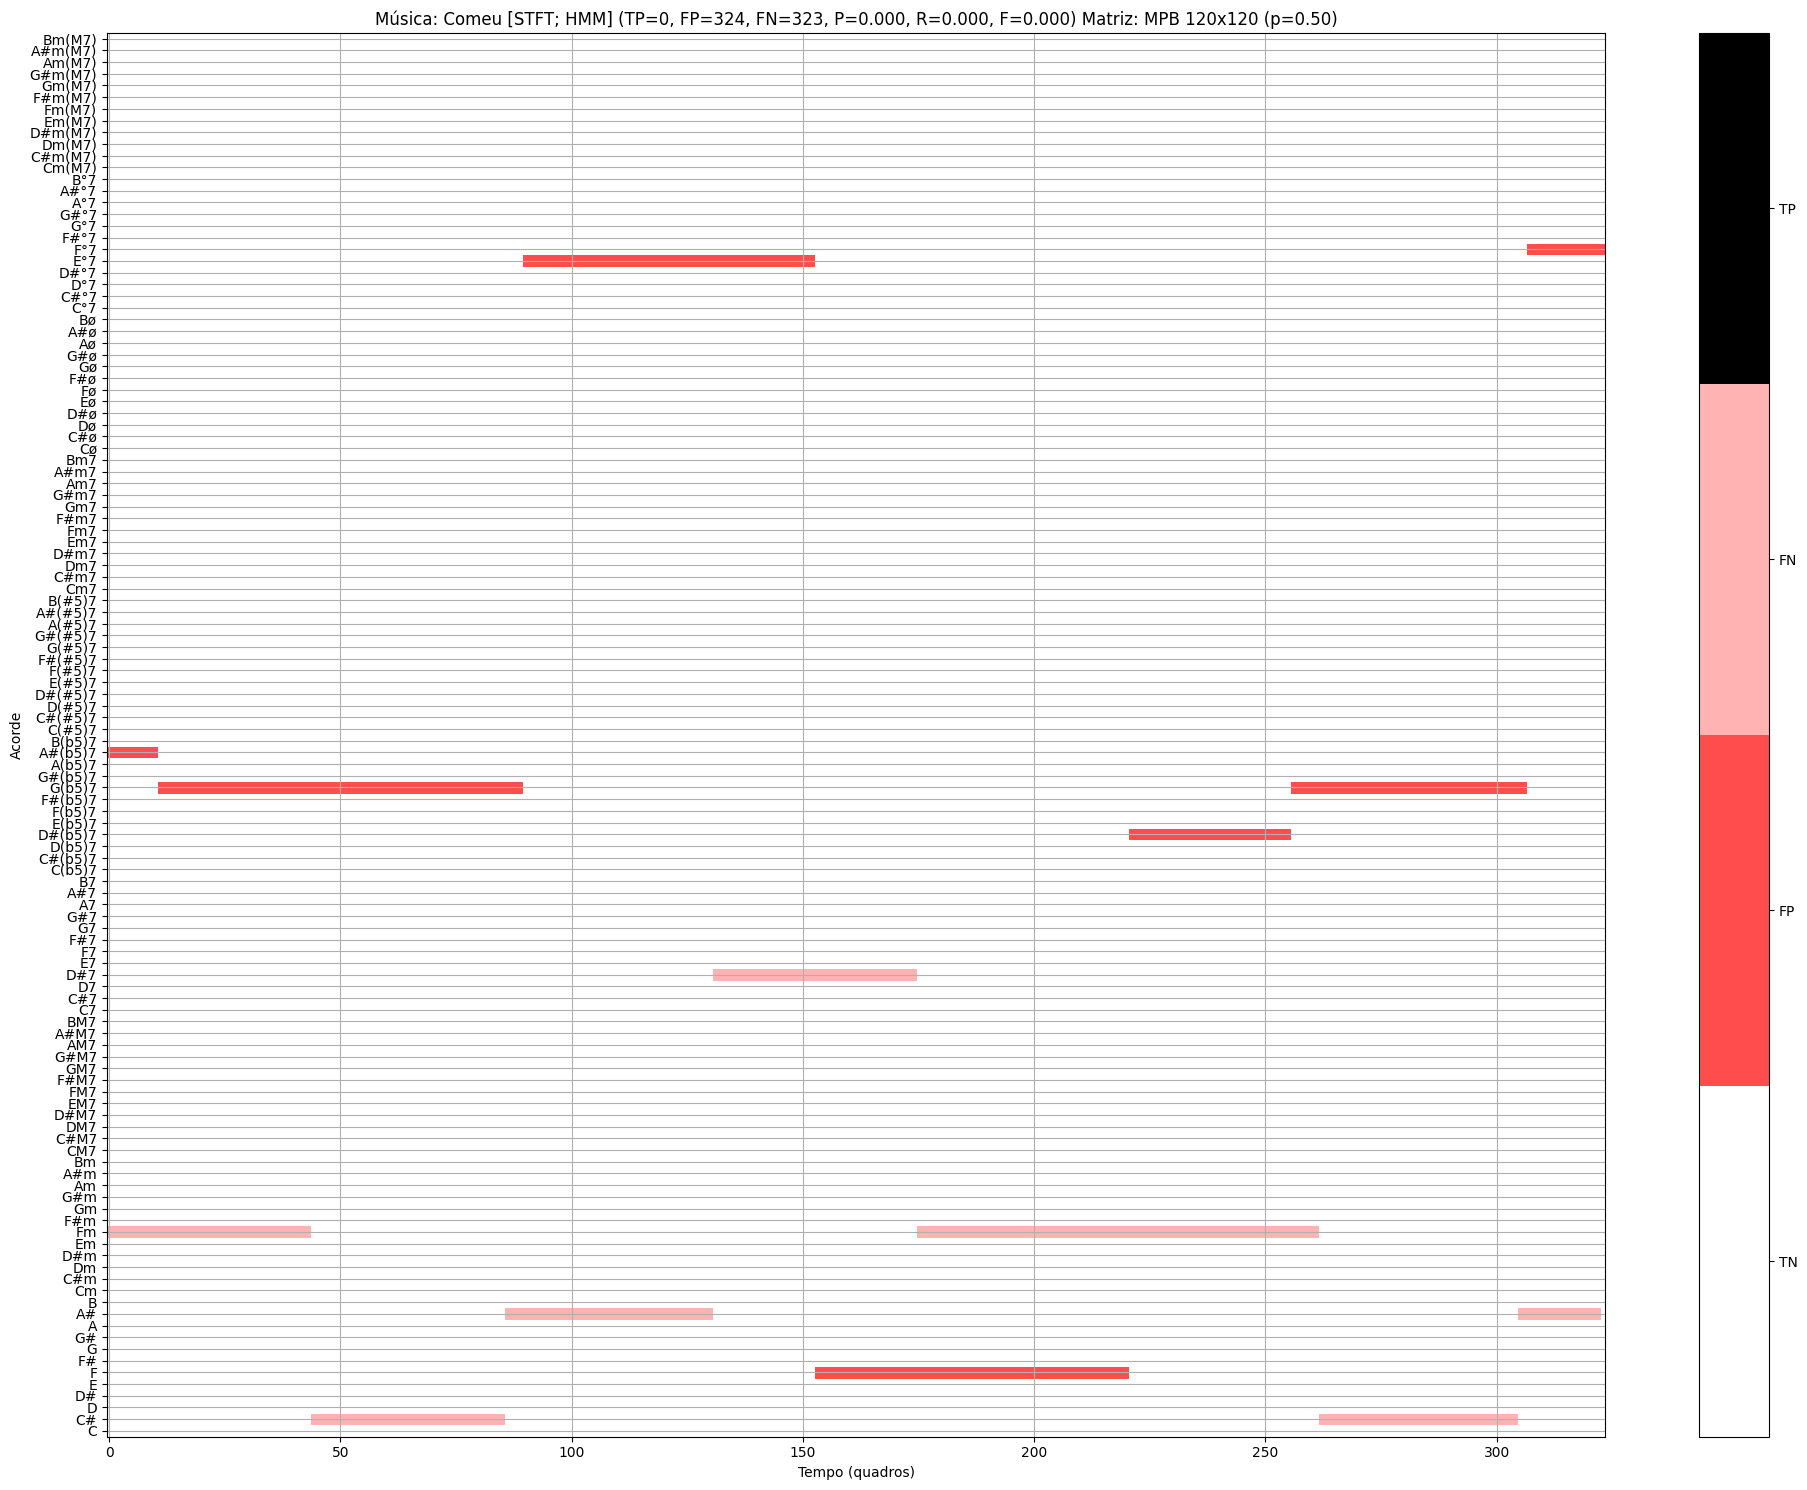

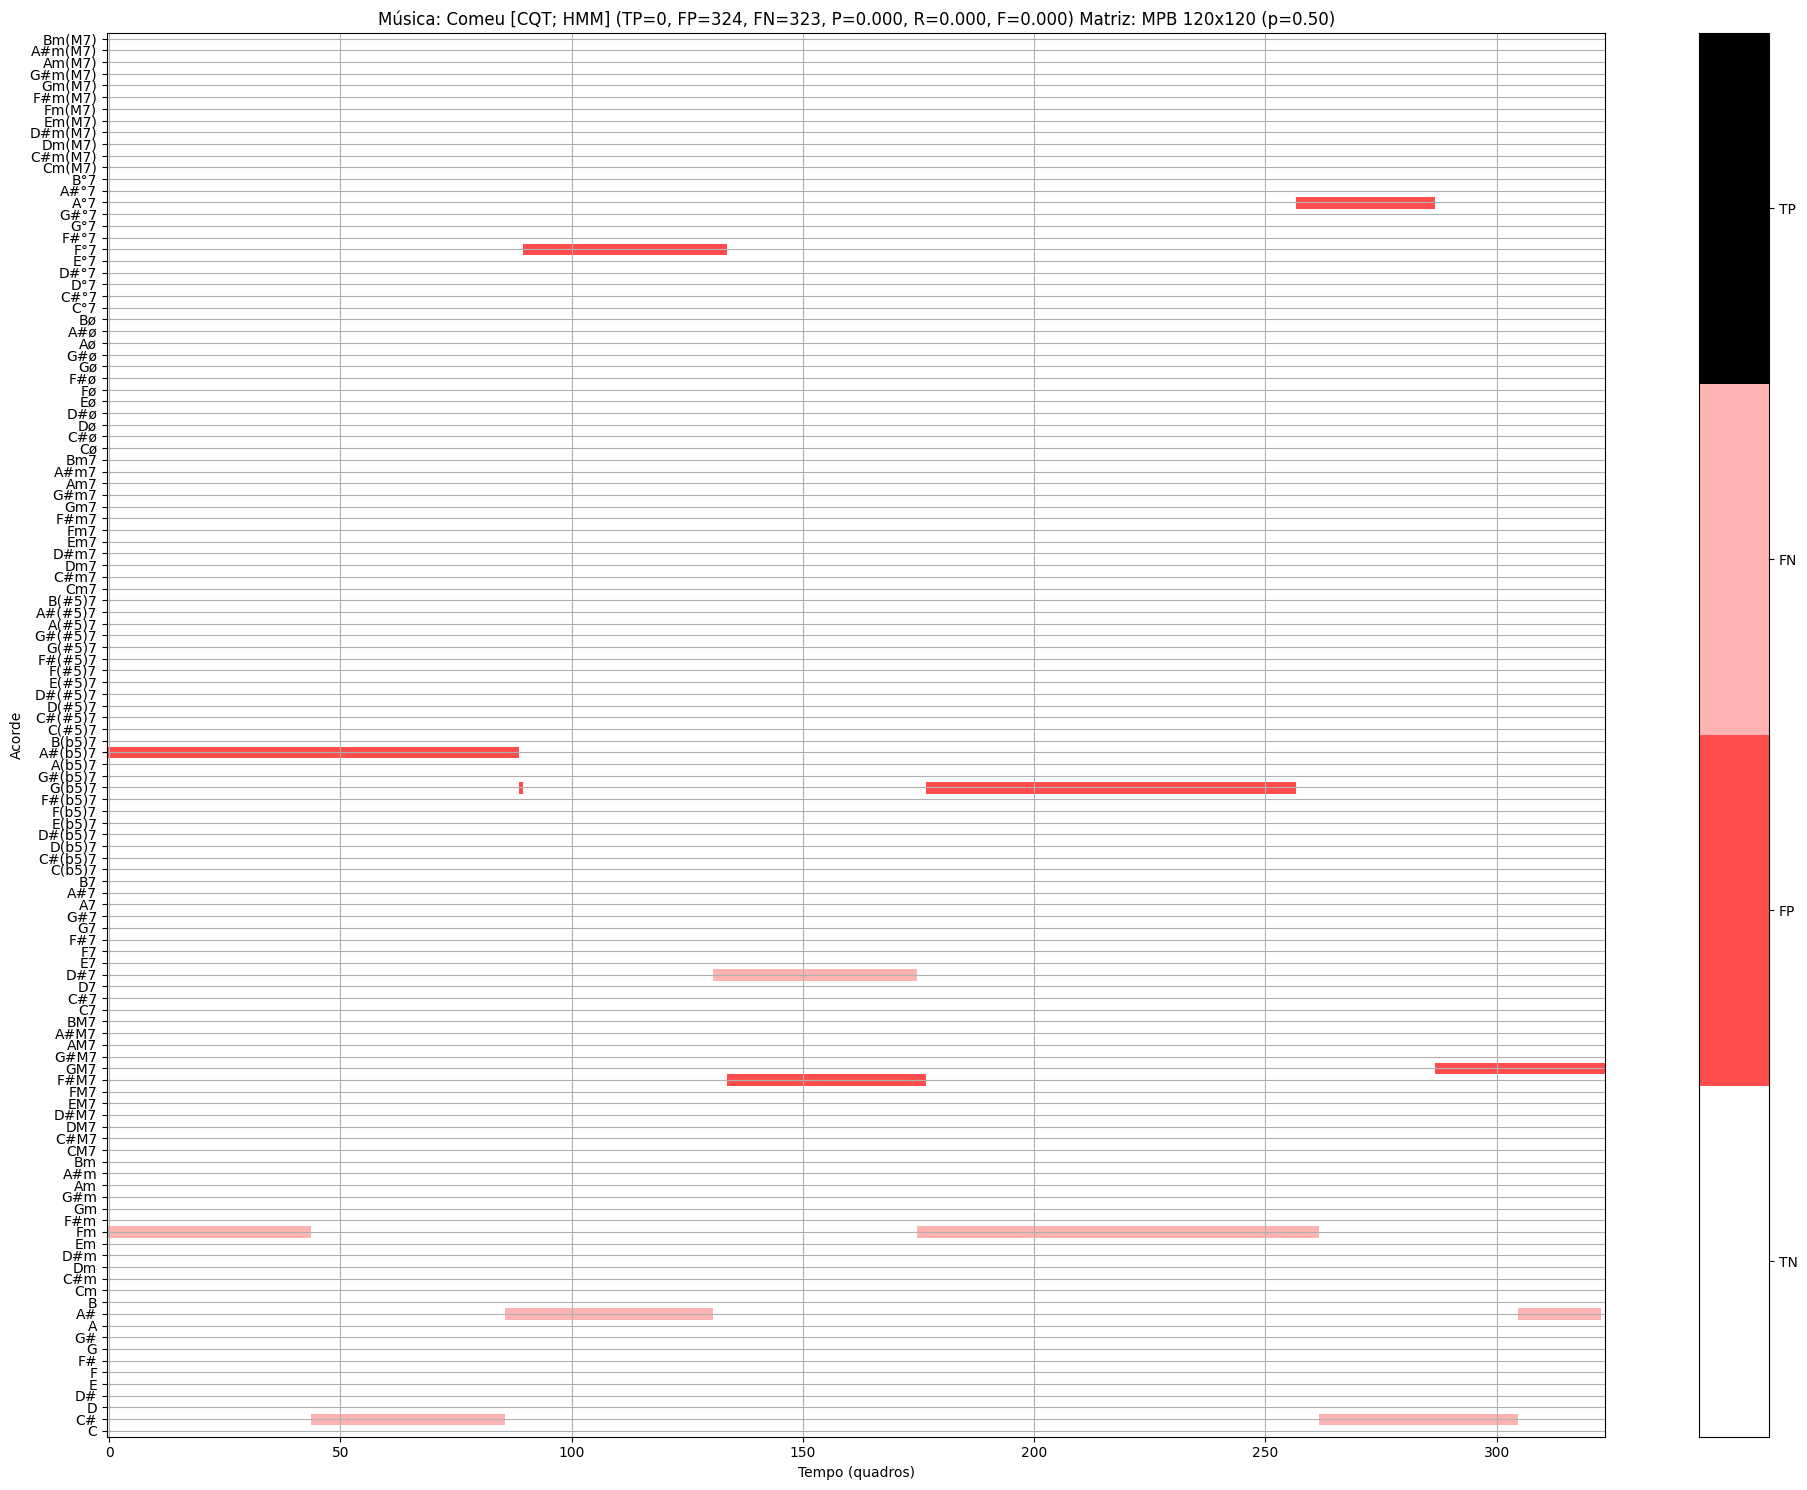

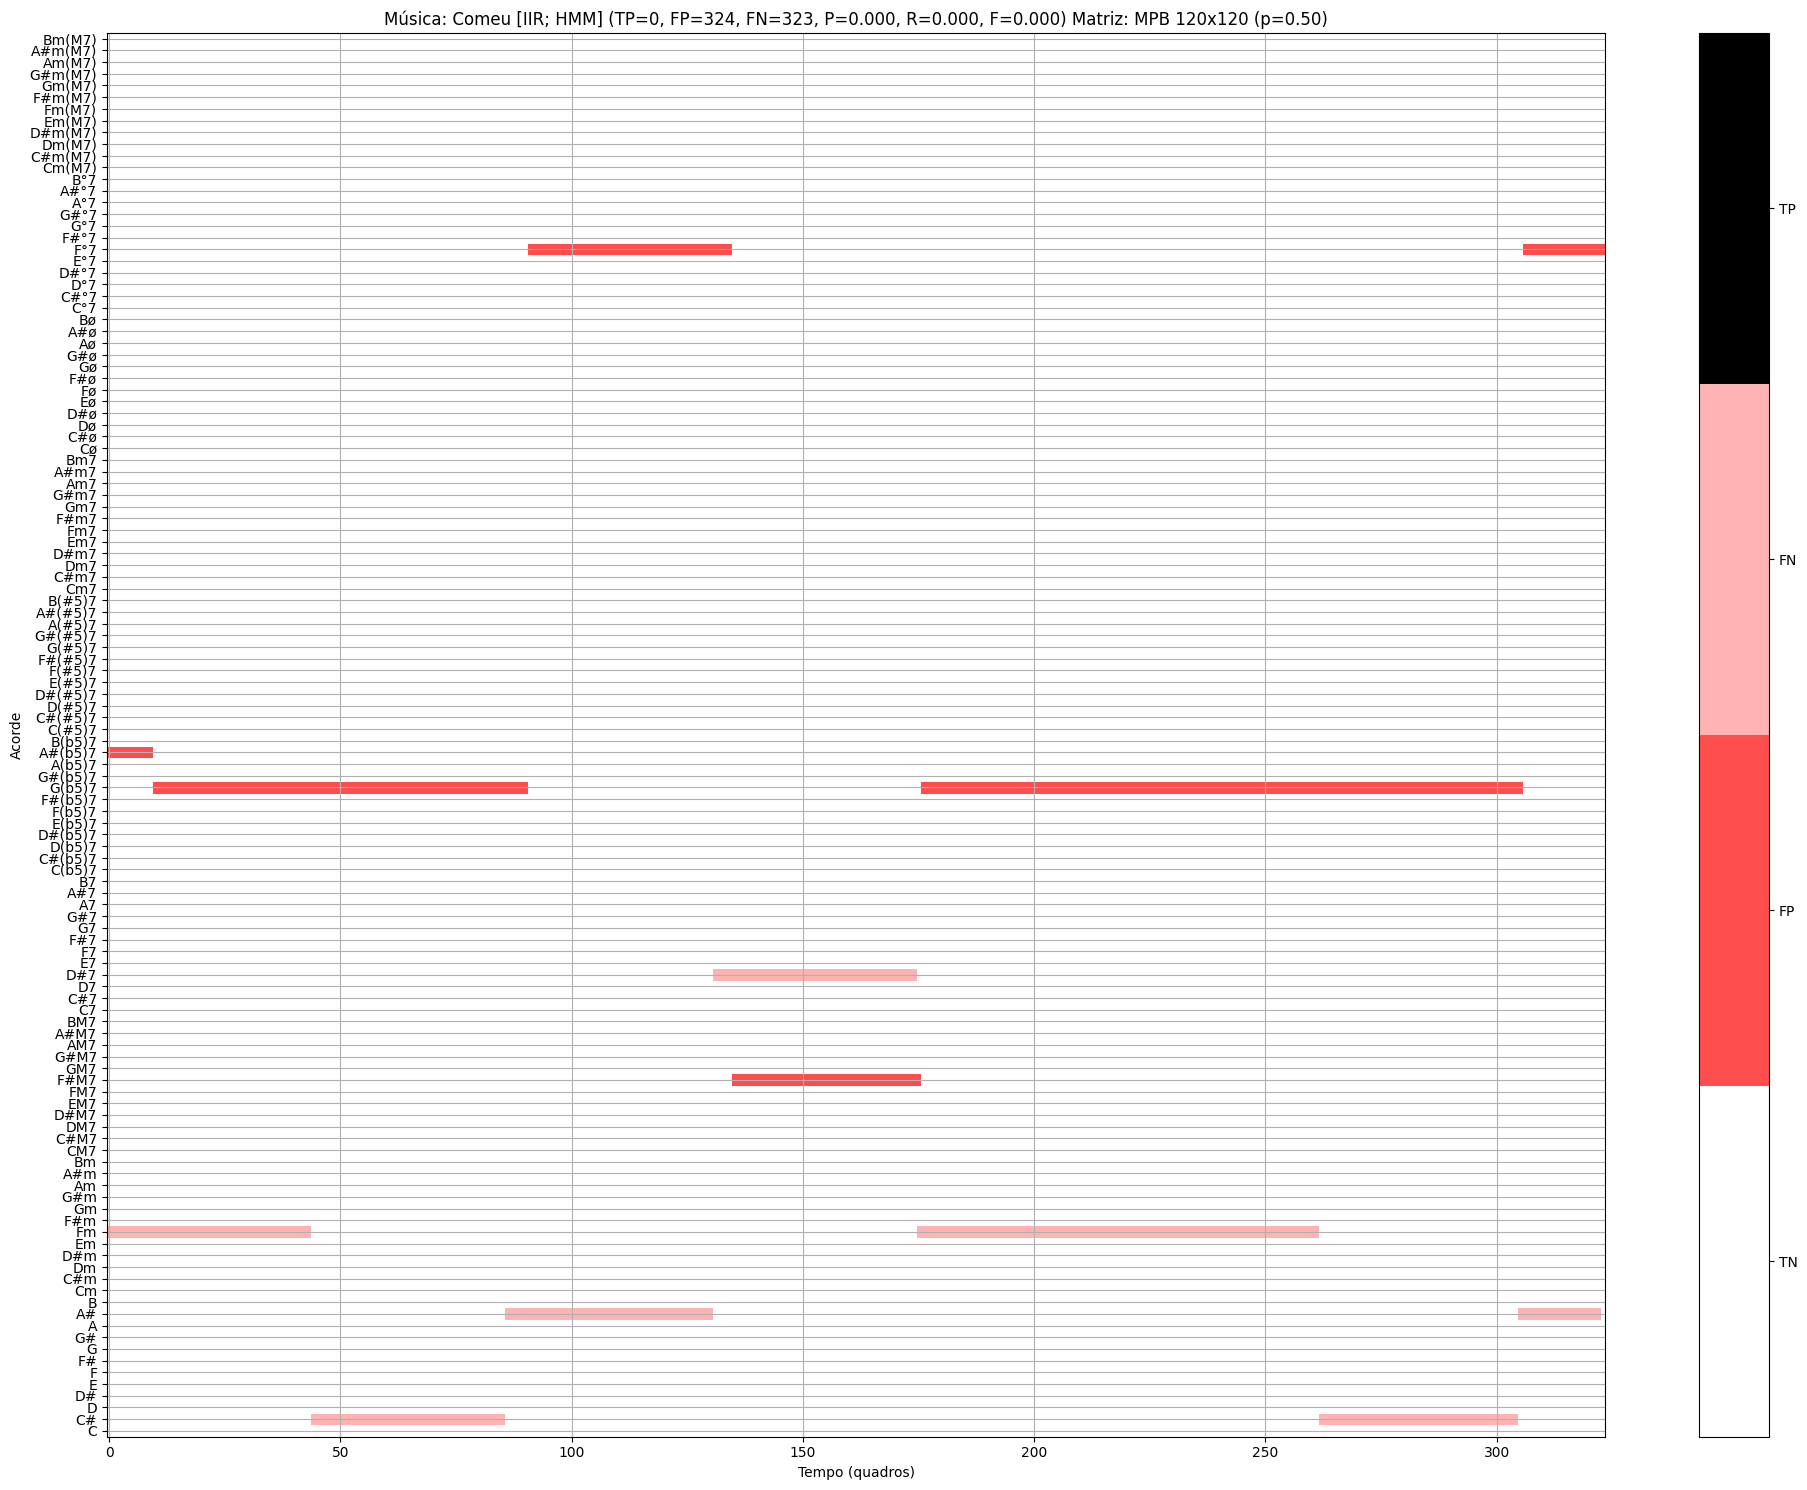

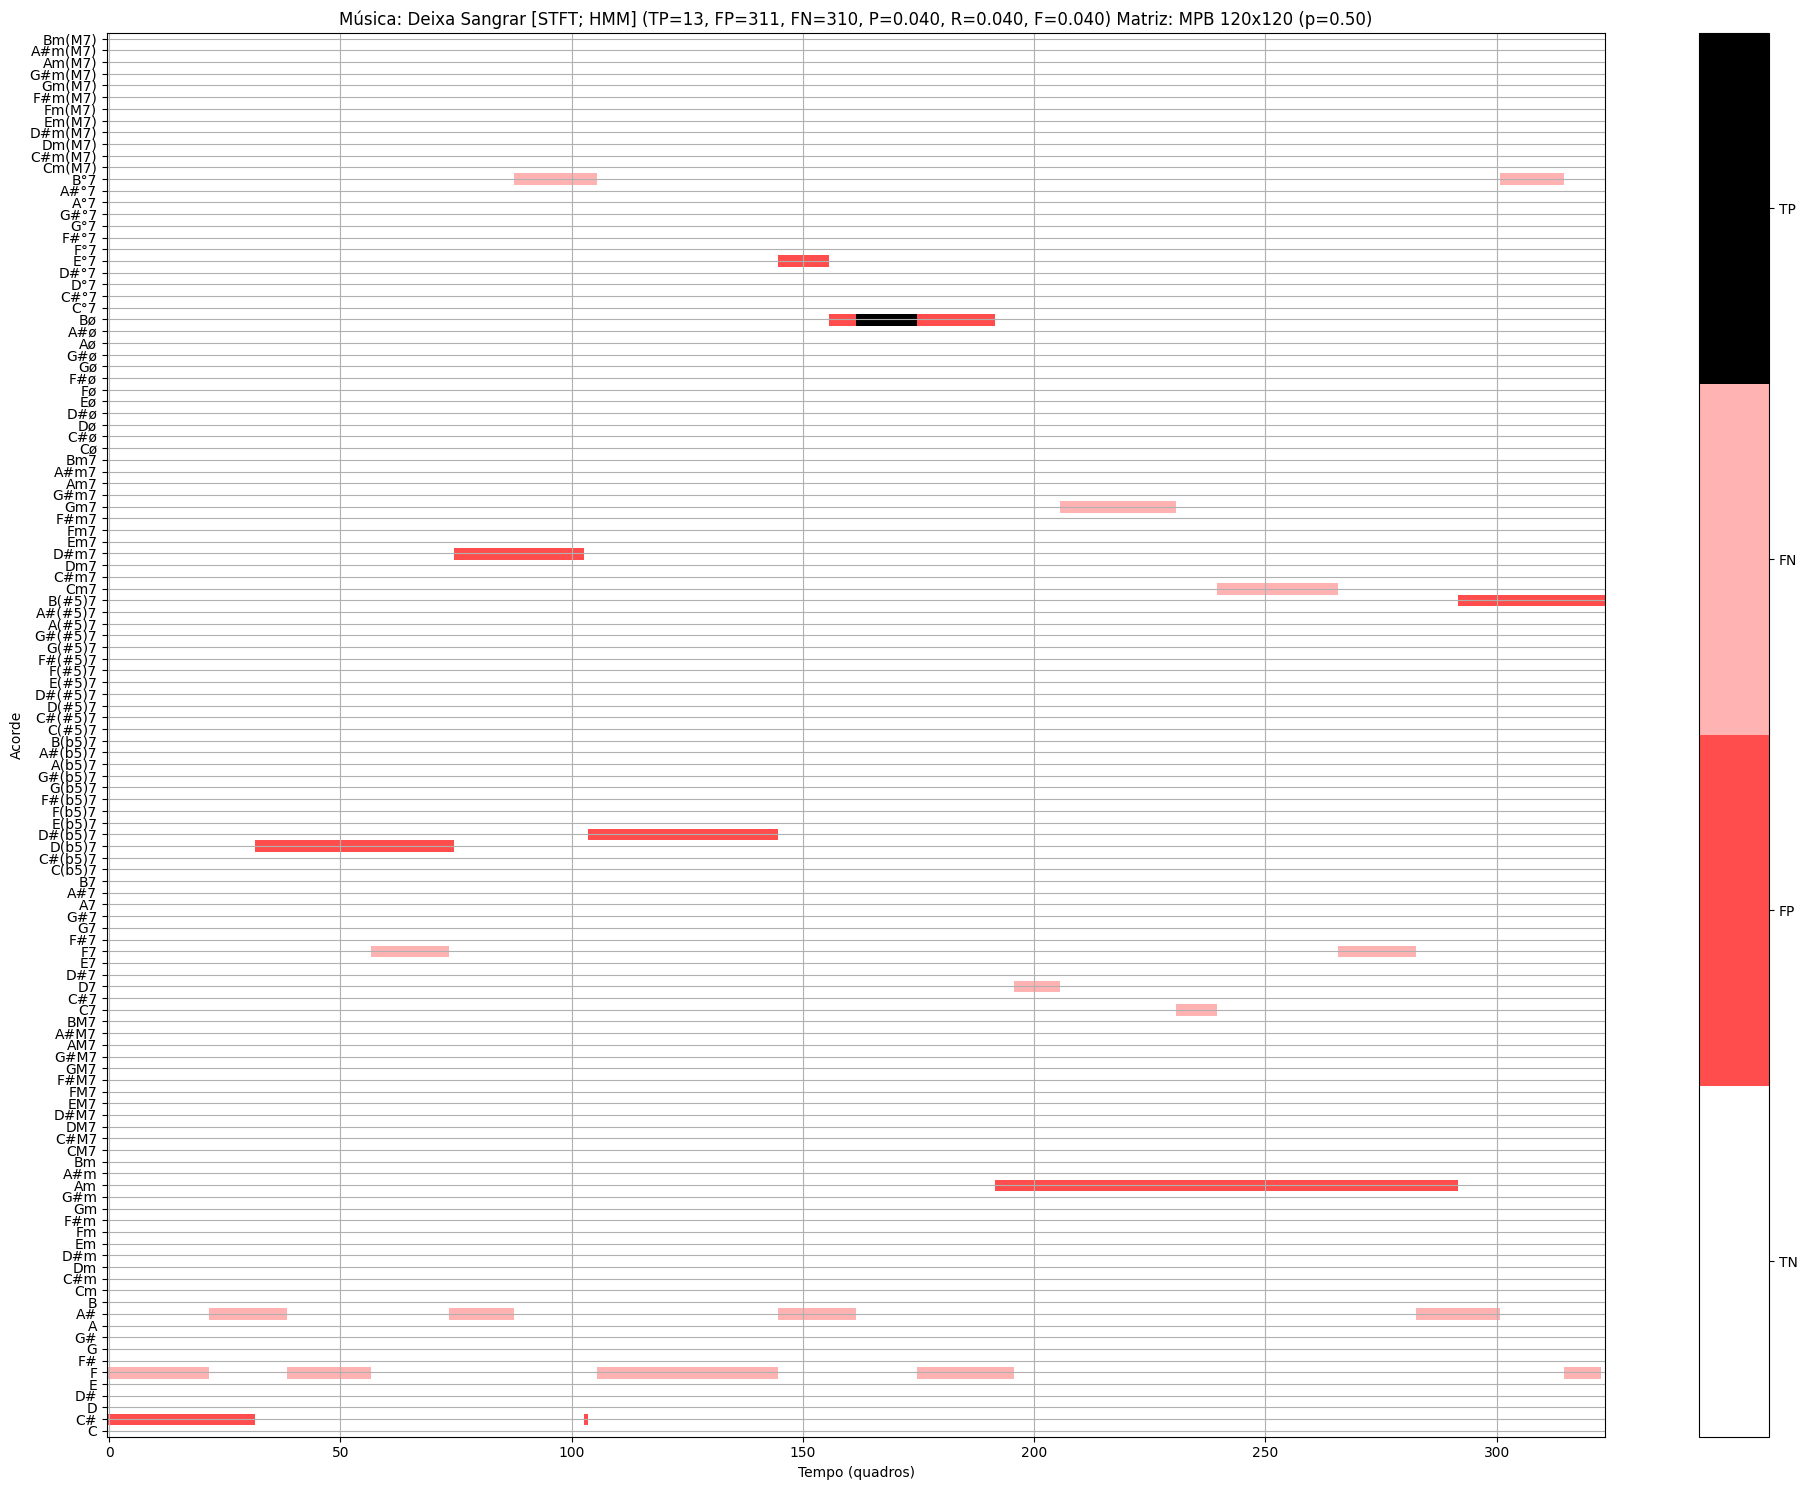

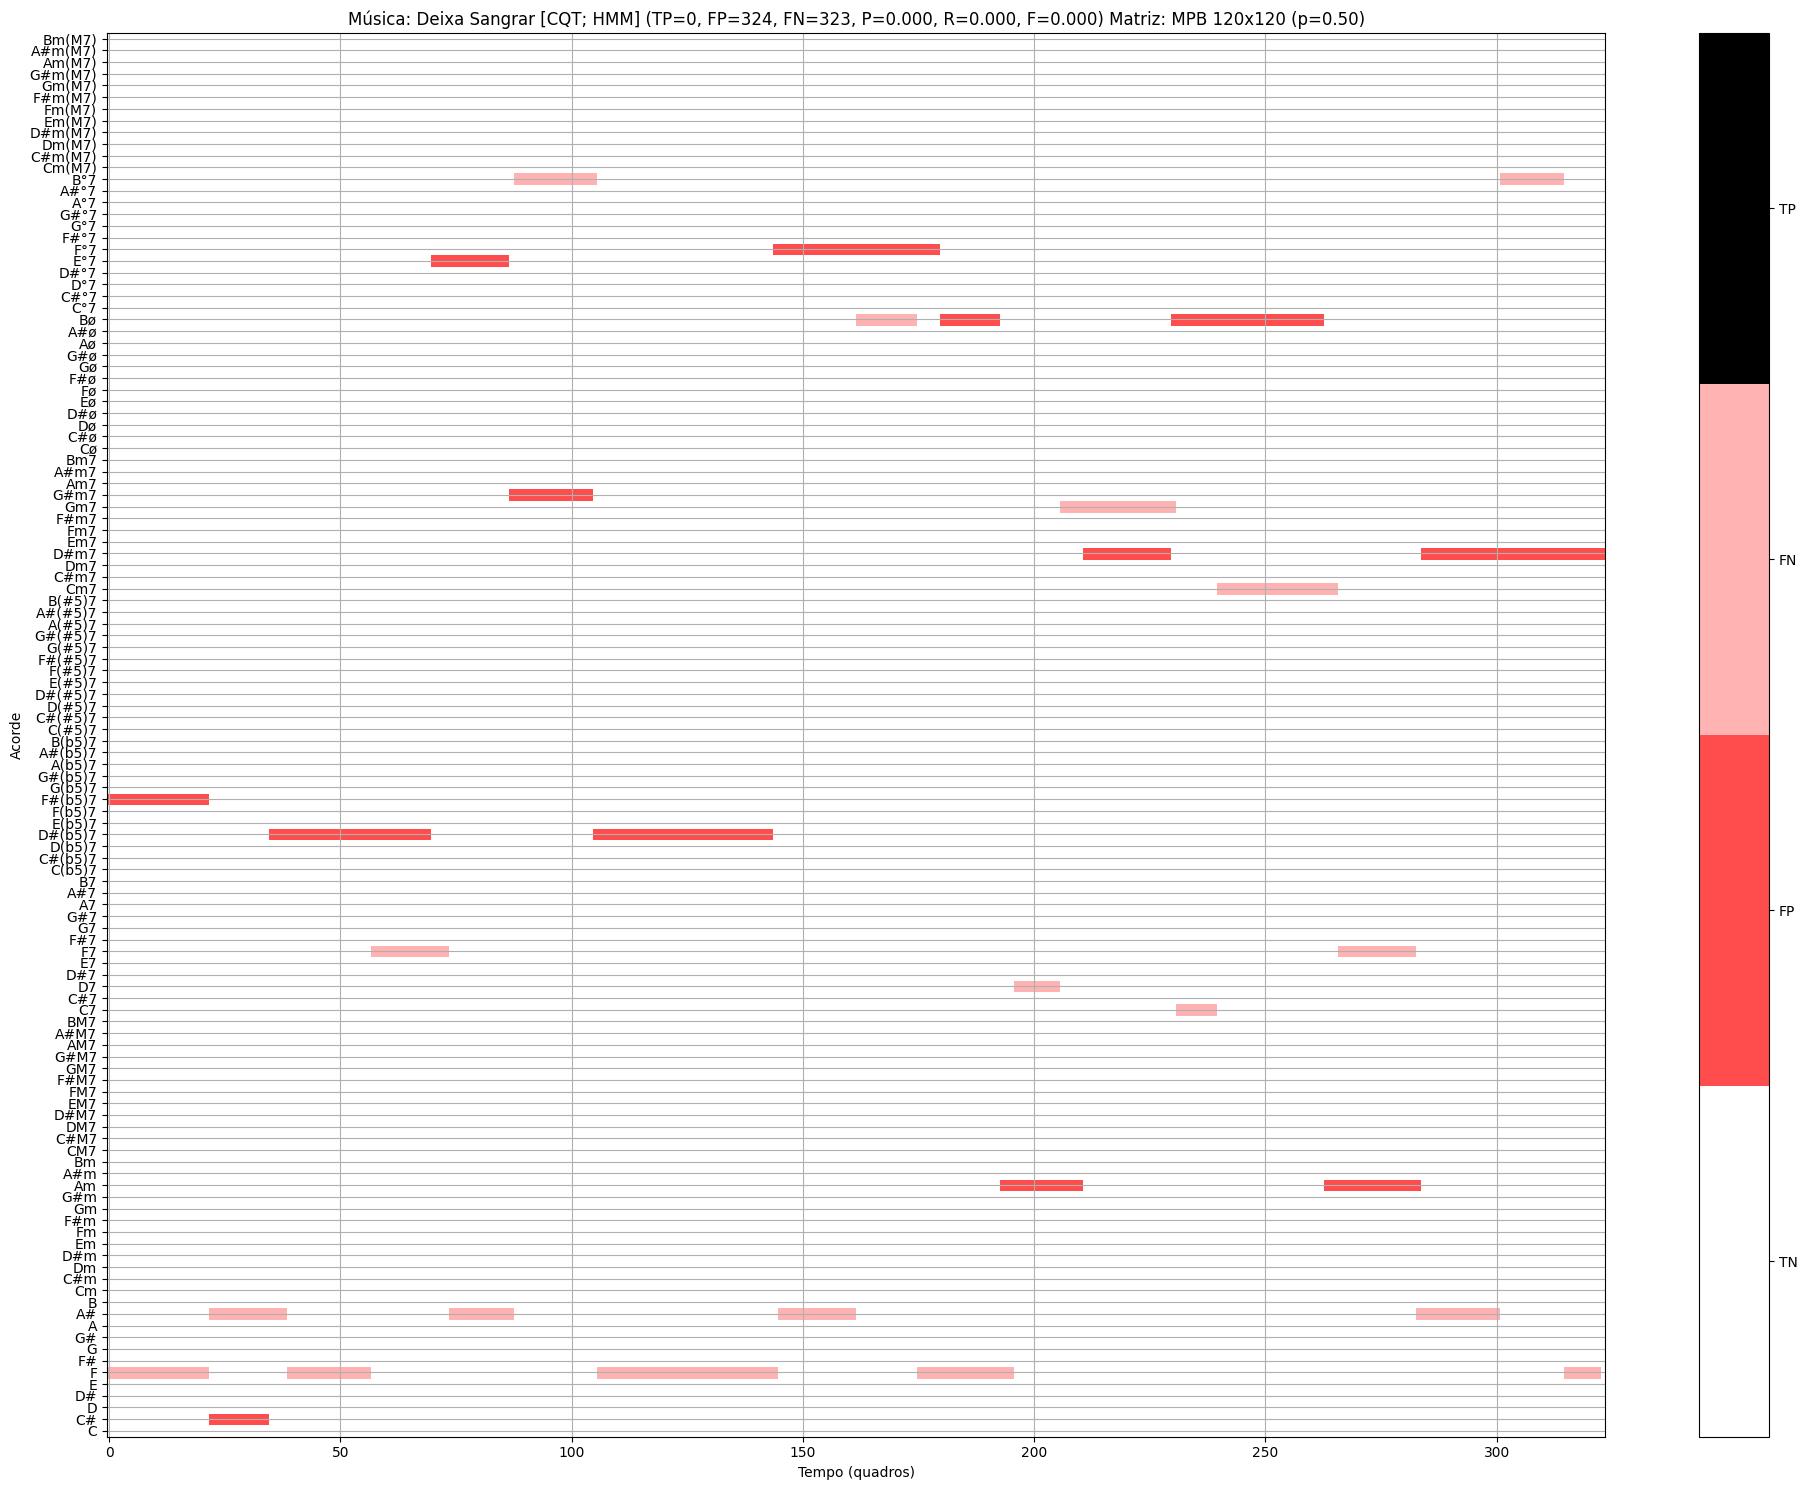

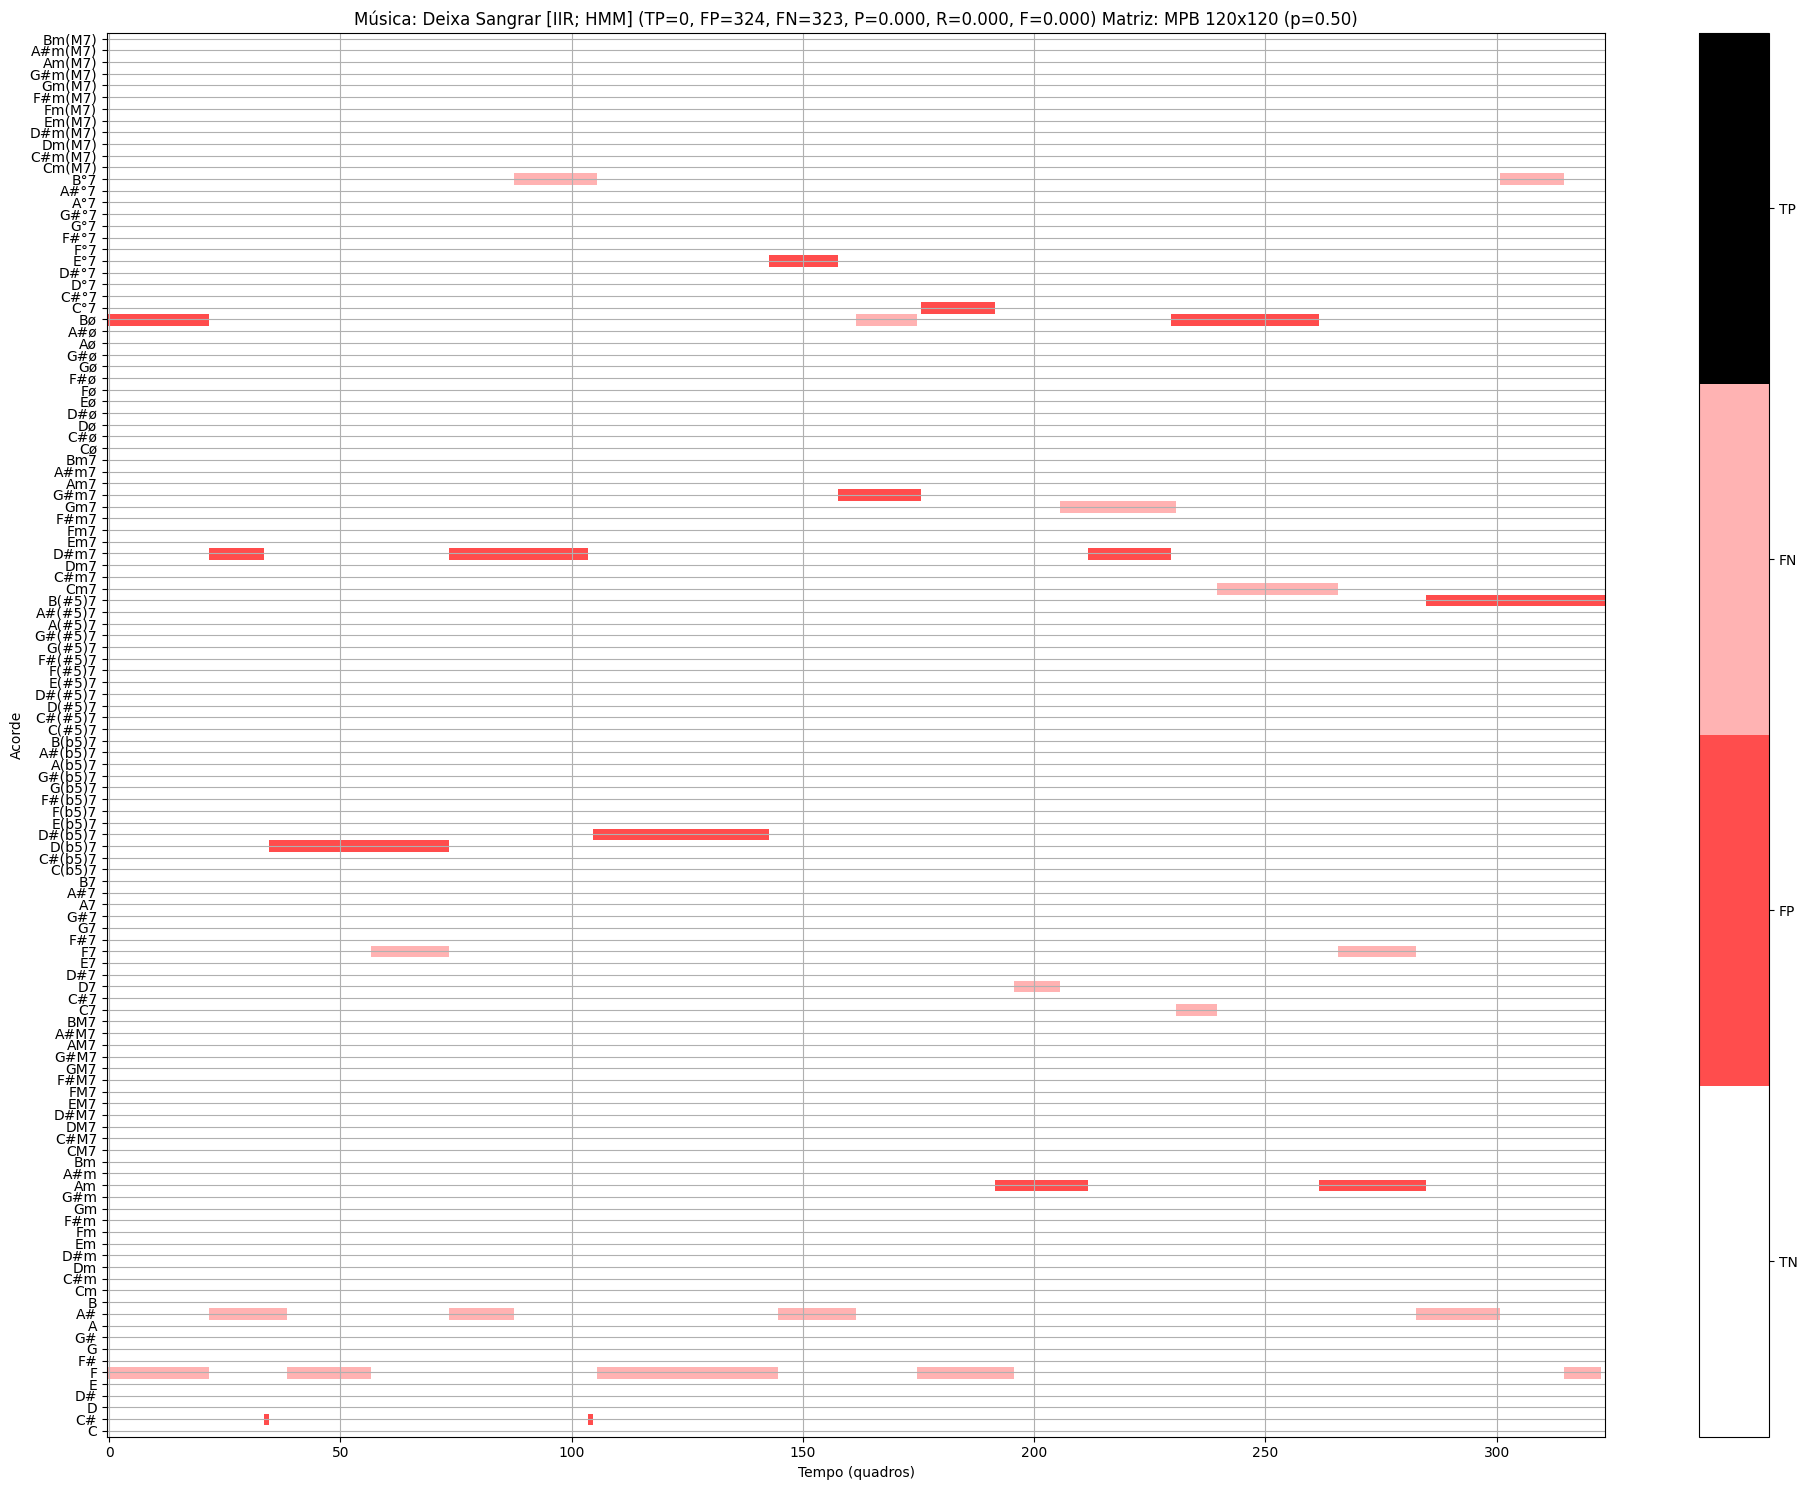

In [6]:
# Matriz mpb 120 z 120
# plt.rcParams.update({'font.size': 9})
p = 0.5
m = 2
for s in song_selected:
    output = chord_recognition_all(X_dict_STFT[s], ann_dict_STFT[s][0], df_2, p=p)
    result_Tem, result_HMM, chord_Tem, chord_HMM, chord_sim = output
    title = 'Música: %s [STFT; HMM]' % song_dict[s][0]
    plot_chord_recognition_result(ann_dict_STFT[s][0], result_HMM, chord_HMM, chord_labels, title=title, t_matrix=m, p=p, figsize=(20, 15))

    output = chord_recognition_all(X_dict_CQT[s], ann_dict_CQT[s][0], df_2, p=p)
    result_Tem, result_HMM, chord_Tem, chord_HMM, chord_sim = output
    title = 'Música: %s [CQT; HMM]' % song_dict[s][0]
    plot_chord_recognition_result(ann_dict_CQT[s][0], result_HMM, chord_HMM, chord_labels, title=title, t_matrix=m, p=p, figsize=(20, 15))
    
    output = chord_recognition_all(X_dict_IIR[s], ann_dict_IIR[s][0], df_2, p=p)
    result_Tem, result_HMM, chord_Tem, chord_HMM, chord_sim = output
    title = 'Música: %s [IIR; HMM]' % song_dict[s][0]
    plot_chord_recognition_result(ann_dict_IIR[s][0], result_HMM, chord_HMM, chord_labels, title=title, t_matrix=m, p=p, figsize=(20, 15))

In [7]:
for s in song_selected:
    stft_p = find_best_p(X_dict_STFT[s], ann_dict_STFT[s][0], df_2)
    cqt_p = find_best_p(X_dict_CQT[s], ann_dict_CQT[s][0], df_2)
    iir_p = find_best_p(X_dict_IIR[s], ann_dict_IIR[s][0], df_2)
    print(f'Resultados para a música {song_dict[s][0]}:\n'
          f'===== STFT =====\n - p = {stft_p[1]}\n - F = {stft_p[0][1]}\n' +
          f'===== CQT =====\n - p = {cqt_p[1]}\n - F = {cqt_p[0][1]}\n' +
          f'===== IIR =====\n - p = {iir_p[1]}\n - F = {iir_p[0][1]}\n')

Resultados para a música Comeu:
===== STFT =====
 - p = [0.1, 0.14]
 - F = 0.01854714064914992
===== CQT =====
 - p = [0.14]
 - F = 0.04327666151468315
===== IIR =====
 - p = [0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14]
 - F = 0.012364760432766617

Resultados para a música Deixa Sangrar:
===== STFT =====
 - p = [0.22, 0.24, 0.26, 0.28, 0.3, 0.32, 0.34, 0.36, 0.38, 0.4, 0.42, 0.44, 0.46, 0.48, 0.5, 0.52, 0.54, 0.56, 0.58, 0.6, 0.62, 0.64, 0.66, 0.68, 0.7, 0.72, 0.74, 0.76, 0.78, 0.8, 0.82, 0.84]
 - F = 0.040185471406491494
===== CQT =====
 - p = [0.08, 0.1, 0.12]
 - F = 0.01854714064914992
===== IIR =====
 - p = [0.96]
 - F = 0.040185471406491494

